# Evaluating NumpyNet using the MNIST dataset

In [1]:
# Import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import nn_utils 
from numpynet import NumpyNet


## Data Processing

### Load data

- The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) can be imported directly by using the [mnist.load_data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data) method which is supplied by `tensorflow.keras.datasets`
- The `load_data()` method returns 
    - Train data tuple
        - **x_train**: uint8 NumPy array of grayscale image data with shapes `(60000, 28, 28)`, containing the training data. Pixel values range from 0 to 255.
        - **y_train**: uint8 NumPy array of digit labels (integers in range 0-9) with shape `(60000,)` for the training data.
    -Test data tuple:
        - **x_test**: uint8 NumPy array of grayscale image data with shapes `(10000, 28, 28)`, containing the test data. Pixel values range from 0 to 255.
        - **y_test**: uint8 NumPy array of digit labels (integers in range 0-9) with shape `(10000,)` for the test data. 

* training set size:  60,000
* test set size: 10,000 

In [2]:
# load data from tf.keras datasets 

(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# make a copy of the x_train data to preserve the original data
# can use for comparison with the processed data
X_train_raw = X_train.copy()

assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert Y_train.shape == (60000,) 
assert Y_test.shape == (10000,)

### Plot images

We create a `plot_images` function so we can call it during image processing to view the transformed images


`plot_images` allows us to plot however many images we want by specifying the desired column number and row number. We can also look as specific slice of the data by passing the index we want to begin the slicing at. 

In [3]:
# plot row_num * col_num images starting at a specified index 
def plot_images(X, Y, row_num, col_num, index=0):
    # total images to show
    num = row_num * col_num
    # set the index to slice by, 0 by default
    if index != 0:
        index = index
        
    # plot images
    fig, axes = plt.subplots(row_num, col_num, figsize=(1.5*col_num, 2*row_num))
    imgs = X[index:num+index]
    labels = Y[index:num+index]
    for i in range(num):
        ax = axes[i//col_num, i%col_num]
        ax.imshow(imgs[i], cmap='gray_r') # black nums against white background
        # ax.imshow(imgs[i], cmap='gray') # to plot white nums against black background
        ax.set_title('label: {}'.format(labels[i]))
        
    plt.tight_layout()
    plt.show()

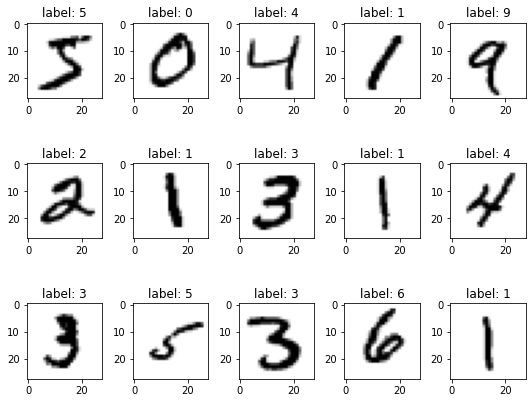

In [4]:
%matplotlib inline
# lets look at the first 15 images in the training set
plot_images(X_train, Y_train, 3, 5, 0)

In [5]:
# Preprocessing training data
train_images = X_train.reshape((60000, 28*28)) # reshape to feed into network
train_images = train_images.astype('float32') / 255 # normalize

# Preprocessing test data
test_images = X_test.reshape((10000, 28 * 28)) # reshape to feed into network
test_images = test_images.astype('float32') / 225 # normalize

# convert labels to categorical values
train_labels = tf.keras.utils.to_categorical(Y_train, num_classes=10, dtype='float32')
test_labels = tf.keras.utils.to_categorical(Y_test, num_classes=10, dtype='float32')




In [6]:
# model architecture
layers_dims = [train_images.shape[1], 512, train_labels.shape[1]]
activations = [None, 'relu', 'softmax']
dnn = NumpyNet(layers_dims, activations, learning_rate=0.002, num_iterations=10000)
dnn.train(train_images, train_labels, print_cost=True)

ValueError: operands could not be broadcast together with shapes (10,) (10,512) 